In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, UnivariateSpline, BarycentricInterpolator


MSE pro f: 0.0070333123218026695
MSE pro g: 0.00885029855767506
MSE pro h: 2.8130617377304804e+45


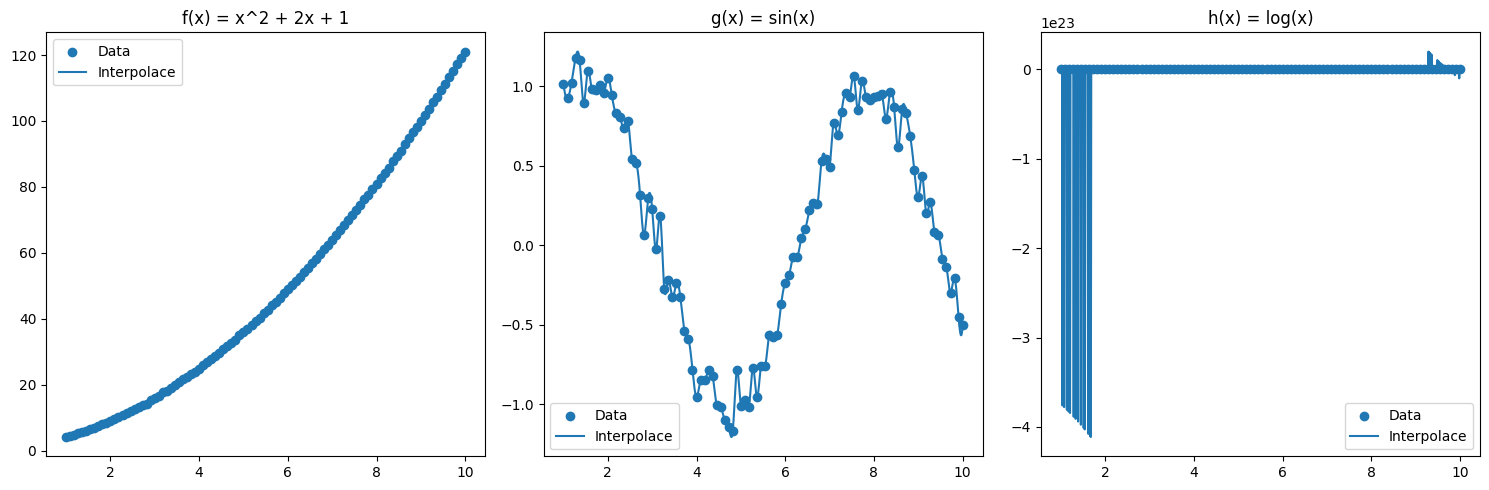

In [ ]:
# funkce
def f(x):
    return x**2 + 2*x + 1

def g(x):
    return np.sin(x)

def h(x):
    return np.log(x)

# vytvoření šumu
np.random.seed(0)
sum = np.random.normal(0, 0.1, 100)

# Výběr bodů
x = np.linspace(1, 10, 100)
y_f = f(x) + sum
y_g = g(x) + sum
y_h = h(x) + sum

# Interpolace nebo aproximace
interp_f = interp1d(x, y_f, kind='linear')
interp_g = interp1d(x, y_g, kind='cubic')
interp_h = BarycentricInterpolator(x, y_h)

# Porovnání přesnosti
x_novy = np.linspace(1, 10, 1000)
y_true_f = f(x_novy)
y_true_g = g(x_novy)
y_true_h = h(x_novy)

mse_f = np.mean((y_true_f - interp_f(x_novy))**2)
mse_g = np.mean((y_true_g - interp_g(x_novy))**2)
mse_h = np.mean((y_true_h - interp_h(x_novy))**2)

print(f"MSE pro f: {mse_f}")
print(f"MSE pro g: {mse_g}")
print(f"MSE pro h: {mse_h}")

# grafy
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x, y_f, label='Data')
plt.plot(x_novy, interp_f(x_novy), label='Interpolace')
plt.title('f(x) = x^2 + 2x + 1')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(x, y_g, label='Data')
plt.plot(x_novy, interp_g(x_novy), label='Interpolace')
plt.title('g(x) = sin(x)')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(x, y_h, label='Data')
plt.plot(x_novy, interp_h(x_novy), label='Interpolace')
plt.title('h(x) = log(x)')
plt.legend()

plt.tight_layout()
plt.show()
